API documentation of latest stable Matplotlib package: http://matplotlib.org/1.5.1/api/pyplot_summary.html

In [1]:
import os
import sys
sys.path.append("../scripts")
# importing matplotlib as usual
import matplotlib.pyplot as plt
# some helper functions
from matplotlib_usage import gauss_samples
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg', 'png')
# %config InlineBackend.print_figure_kwargs = {'bbox_inches':"tight"}

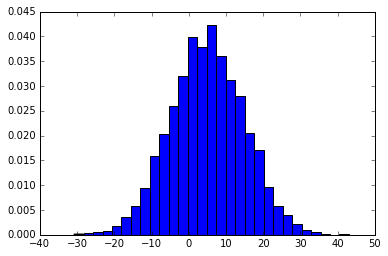

In [2]:
samples = gauss_samples(5,10, 10000)
plt.hist(x=samples, bins=30, normed=True);